### 1. Import Necessasary libraries

In [13]:
import pandas as pd

from matplotlib import pyplot as plt

### 2. Import Dataset

In [10]:
daily_temp = pd.read_csv('daily-minimum-temperatures.csv',parse_dates=False,)
daily_temp

,Date,Temp
0,1981-01-01,20.7
1,1981-01-02,17.9
2,1981-01-03,18.8
3,1981-01-04,14.6
4,1981-01-05,15.8
...,...,...
3645,1990-12-27,14.0
3646,1990-12-28,13.6
3647,1990-12-29,13.5
3648,1990-12-30,15.7


### 3. Data Understanding

In [11]:
daily_temp.shape

(3650, 2)

In [12]:
daily_temp.dtypes

Date     object
Temp    float64
dtype: object

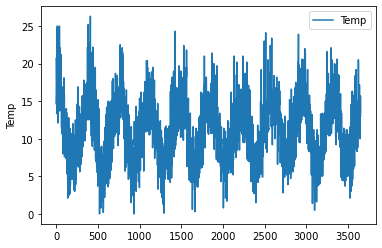

In [17]:
daily_temp.plot()
plt.ylabel('Temp')
plt.show()

### Get the data with Parse dates

### 2. Import Dataset

In [23]:
daily_temp_2 = pd.read_csv('daily-minimum-temperatures.csv',parse_dates=True,index_col = 'Date',)
daily_temp_2

,Temp
Date,
1981-01-01,20.7
1981-01-02,17.9
1981-01-03,18.8
1981-01-04,14.6
1981-01-05,15.8
...,...
1990-12-27,14.0
1990-12-28,13.6
1990-12-29,13.5


### 3. Data Understanding

In [18]:
daily_temp_2.shape

(3650, 1)

In [19]:
daily_temp_2.dtypes

Temp    float64
dtype: object

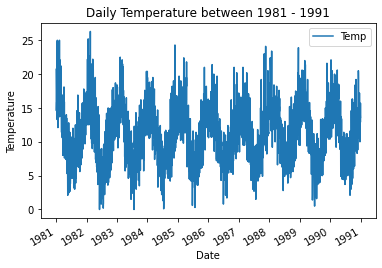

In [26]:
daily_temp_2.plot()
plt.ylabel('Temperature')
plt.title('Daily Temperature between 1981 - 1991')
plt.show()

### EDA with Vizualization Charts

In [29]:
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

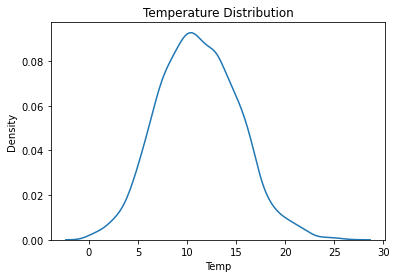

In [32]:
sns.distplot(daily_temp_2['Temp'],hist=False)
plt.title('Temperature Distribution')
plt.show()

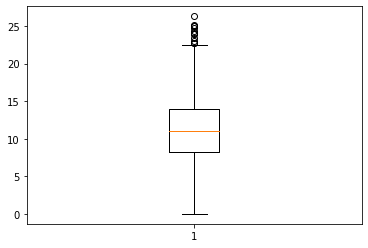

In [34]:
plt.boxplot(x = 'Temp',data = daily_temp_2)
plt.show()

In [41]:
daily_temp_3 = pd.read_csv('daily-minimum-temperatures.csv', index_col=0,parse_dates=True,squeeze=True,)
# If the parsed data only contains one column then return a Series.
daily_temp_3

Date
1981-01-01    20.7
1981-01-02    17.9
1981-01-03    18.8
1981-01-04    14.6
1981-01-05    15.8
              ... 
1990-12-27    14.0
1990-12-28    13.6
1990-12-29    13.5
1990-12-30    15.7
1990-12-31    13.0
Name: Temp, Length: 3650, dtype: float64

In [42]:
groups = daily_temp_3.groupby(Grouper(freq='A'))
groups

In [47]:
for name, group in groups:
    years[name.year] = group.values
years

,1981,1982,1983,1984,1985,1986,1987,1988,1989,1990
0,20.7,17.0,18.4,19.5,13.3,12.9,12.3,15.3,14.3,14.8
1,17.9,15.0,15.0,17.1,15.2,13.8,13.8,14.3,17.4,13.3
2,18.8,13.5,10.9,17.1,13.1,10.6,15.3,13.5,18.5,15.6
3,14.6,15.2,11.4,12.0,12.7,12.6,15.6,15.0,16.8,14.5
4,15.8,13.0,14.8,11.0,14.6,13.7,16.2,13.6,11.5,14.3
...,...,...,...,...,...,...,...,...,...,...
360,15.5,15.3,13.9,12.2,11.5,14.6,16.2,9.5,13.3,14.0
361,13.3,16.3,11.1,12.0,10.8,14.2,14.2,12.9,11.7,13.6
362,15.6,15.8,16.1,12.6,12.0,13.2,14.3,12.9,10.4,13.5
363,15.2,17.7,20.4,16.0,16.3,11.7,13.3,14.8,14.4,15.7


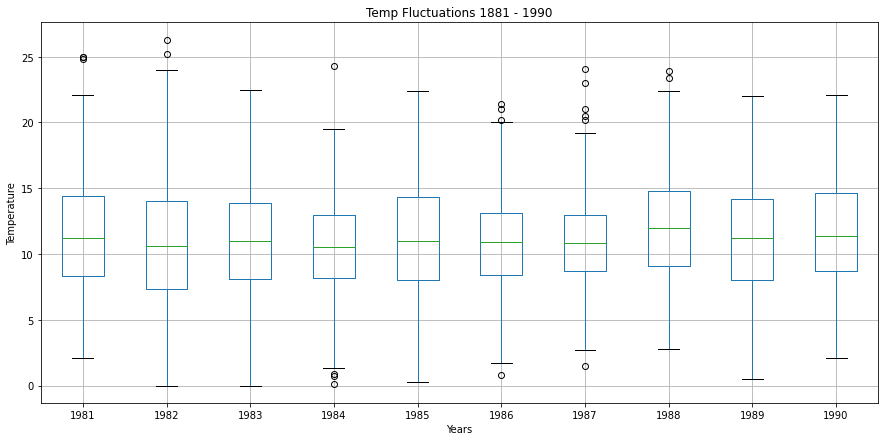

In [52]:
plt.figure(figsize=(15,7))
years.boxplot()
plt.title('Temp Fluctuations 1881 - 1990')
plt.ylabel('Temperature')
plt.xlabel('Years')
plt.show()

### Lag Plot
**Why LagPlot? To Bring out possible association between successive samples.**

In [53]:
from pandas.plotting import lag_plot

In [54]:
daily_temp_2

,Temp
Date,
1981-01-01,20.7
1981-01-02,17.9
1981-01-03,18.8
1981-01-04,14.6
1981-01-05,15.8
...,...
1990-12-27,14.0
1990-12-28,13.6
1990-12-29,13.5


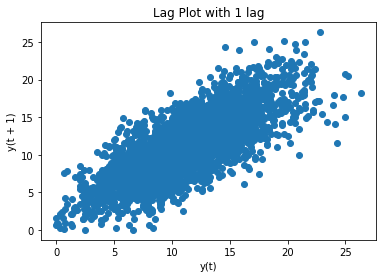

In [66]:
lag_plot(series = daily_temp_2 , lag=1)
plt.title('Lag Plot with 1 lag')
plt.show()

### ACF Plot

<Figure size 2880x720 with 0 Axes>

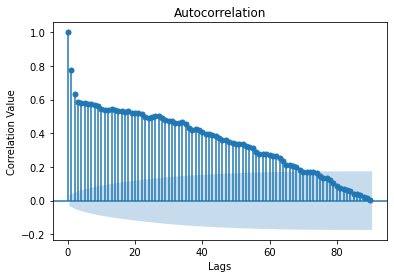

In [61]:
plt.figure(figsize = (40,10))
from statsmodels.graphics.tsaplots import plot_acf

plot_acf(daily_temp_2,lags=90)
plt.ylabel('Correlation Value')
plt.xlabel('Lags')
plt.show()

### THE END!!